In [ ]:
import cv2
import os

def extract_frames(video_path, frames_dir, overwrite=False, start=-1, end=-1, every=1):
    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    assert os.path.exists(video_path)  # assert the video file exists

    capture = cv2.VideoCapture(video_path)  # open the video using OpenCV

    if start < 0:  # if start isn't specified lets assume 0
        start = 0
    if end < 0:  # if end isn't specified assume the end of the video
        end = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

    capture.set(1, start)  # set the starting frame of the capture
    frame = start  # keep track of which frame we are up to, starting from start
    while_safety = 0  # a safety counter to ensure we don't enter an infinite while loop (hopefully we won't need it)
    saved_count = 0  # a count of how many frames we have saved

    while frame < end:  # lets loop through the frames until the end

        _, image = capture.read()  # read an image from the capture

        if while_safety > 500:  # break the while if our safety maxs out at 500
            break

        # sometimes OpenCV reads None's during a video, in which case we want to just skip
        if image is None:  # if we get a bad return flag or the image we read is None, lets not save
            while_safety += 1  # add 1 to our while safety, since we skip before incrementing our frame variable
            continue  # skip

        if frame % every == 0:  # if this is a frame we want to write out based on the 'every' argument
            while_safety = 0  # reset the safety count
            save_path = os.path.join(frames_dir, video_filename, "{:010d}.jpg".format(frame))  # create the save path
            if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                cv2.imwrite(save_path, image)  # save the extracted image
                saved_count += 1  # increment our counter by one

        frame += 1  # increment our frame count

    capture.release()  # after the while has finished close the capture

    return saved_count 

In [ ]:
extract_frames("/content/videoTest.mp4", frames_dir, overwrite=False, start=-1, end=-1, every=1)

In [ ]:
import cv2
import math

cap = cv2.VideoCapture("/content/videoTest.mp4")
frameRate = cap.get(5) #frame rate
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = "/content/sample_data/frames1" +  str(int(frameId)) + ".jpg"
        cv2.imwrite(filename, frame)
cap.release()

In [ ]:
import cv2

def three_images_per_second(video_file, output_dir, fps):
    cap = cv2.VideoCapture(video_file)
    frame_num = 0
    image_num = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            if frame_num % (fps // 3) == 0:
                cv2.imwrite(output_dir+"/image{}.jpg".format(image_num),frame)
                image_num += 1
        else:
            break
        frame_num += 1

    cap.release()
    cv2.destroyAllWindows()
    return

three_images_per_second("/Users/muskan mohanty/Desktop/video detection/videoTest.mp4", "/Users/muskan mohanty/Desktop/framesvd",20)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

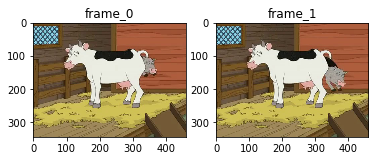

In [ ]:
frame_0 = mpimg.imread('/Users/muskan mohanty/Desktop/framesvd/image0.jpg')
frame_1 = mpimg.imread('/Users/muskan mohanty/Desktop/framesvd/image2.jpg')
# showing the frames
f, (plt1, plt2) = plt.subplots(1, 2)
plt1.set_title('frame_0');plt1.imshow(frame_0,interpolation='nearest');
plt2.set_title('frame_1');plt2.imshow(frame_1,interpolation='nearest');

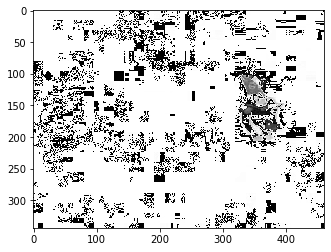

In [ ]:
plt.imshow(np.subtract(frame_0[:,:,0], frame_1[:,:,0]),interpolation='nearest',cmap=plt.cm.binary);

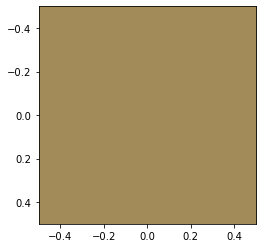

In [ ]:
# the block we want to motion estimate
ball = frame_0[312:313,323:324,]

block_size = 100
plt.imshow(ball,interpolation='nearest');

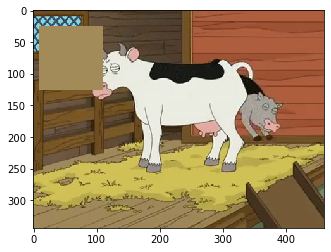

In [ ]:
# let's pretend we had motion estimation (full scan, reduced scan(lfp)...) 
# and that the motion vectors were:
x = 26 
y = 10
predicted_frame = np.array(frame_1)

# applying the motion compensation
predicted_frame[x:(x+block_size),y:(y+block_size),] = ball

plt.imshow(predicted_frame,interpolation='nearest');

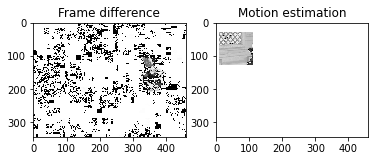

In [ ]:
f, (plt1, plt2) = plt.subplots(1, 2)
plt1.set_title('Frame difference');plt1.imshow(np.subtract(frame_0[:,:,0], frame_1[:,:,0]),interpolation='nearest',cmap=plt.cm.binary);
plt2.set_title('Motion estimation');plt2.imshow(np.subtract(predicted_frame[:,:,0], frame_1[:,:,0]),interpolation='nearest',cmap=plt.cm.binary);